In [2]:
import pandas as pd
import glob
%config IPCompleter.use_jedi=False

from sklearn.model_selection import train_test_split

In [3]:
Data1 = pd.read_csv("Data/201801-citibike-tripdata.csv")

In [4]:
Data1

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718989,843,2018-01-31 17:28:27.5390,2018-01-31 17:42:30.5890,3664,North Moore St & Greenwich St,40.720195,-74.010301,410,Suffolk St & Stanton St,40.720664,-73.985180,15153,Subscriber,1981,1
718990,244,2018-01-31 17:34:20.4510,2018-01-31 17:38:24.7200,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,26896,Subscriber,1960,1
718991,302,2018-01-31 18:20:55.5430,2018-01-31 18:25:58.3350,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,33111,Subscriber,1965,1
718992,222,2018-01-31 18:47:42.5720,2018-01-31 18:51:24.6830,3664,North Moore St & Greenwich St,40.720195,-74.010301,257,Lispenard St & Broadway,40.719392,-74.002472,16675,Subscriber,1969,0


In [6]:
grouping = Data1.groupby("usertype").size()
ratio = grouping["Subscriber"] / grouping["Customer"]
ratio

31.52189252759182

In [7]:
Data1["start station id"].value_counts()

519     8080
435     5093
3255    4852
402     4526
497     4503
        ... 
3485       2
3250       1
3662       1
428        1
3488       1
Name: start station id, Length: 763, dtype: int64

## IDEAS

First split into train,validation,and Test before even plotting the data.
(How large should each data set be?)
Only plot training data, neve rlook at test data! Otherwise my your knowledge of test data biases test error estimates.

Is data set "Balanced"? Should I try to preserve some balance in train, val, test split?
-> Subscribers make MANY more trips

Remove outliers from triptime and birthyear data

1. Load all files into one data frame grouped by month -> Can pandas even do this?
2. Split Data -> I do one fixed train,test,validation split at the beginning and never change it because the data set is very large and I dont expect much variation over splits. I could otherwise do corss-validation or something. Question: Should one balance labels somehow in the splits?
3. Compute trip durations -> already done, and length (how??? luftlinie oder station distances -> Google maps API?) from the data
    1. Can use OSMnx
    2. Use Taxicab metric (simpler) -> Actually not simpler at all, need coordinates relative to new york layout
    3. Luftlinie (am einfachsten)
4. Compute weekdays vs weekends
5. Can one do somethign with bikeID?
6. Can one do something with stationID?
7. Compare to baseline of simply choosing most likely class label, ignoring user data!
   Or use other ways of dealing with imbalance / representing effect?

Features need to be preprocessed -> Encode categorically etc.

Some feature ideas:
1. Time
2. Distance
3. Speed
4. Workday vs Weekend (maybe even include holidays)
5. Month (maybe)
6. StartStation -> Because people from similar areas might be subscribers / not 

## Evaluation?

1. Evaluate vs baseline (baseline = always choos "subscriber" as label)
2. Confusion matrix

Try loading the whole dataset

In [9]:
filenames = glob.glob("Data/2*.csv")
print(filenames)
dfs = []
for filename in filenames:
    month = filename[9:11]
    print(month)
    d = pd.read_csv(filename)
    d["month"] = month    
    dfs.append(d)
data = pd.concat(dfs,ignore_index=True)

['Data/201810-citibike-tripdata.csv', 'Data/201802-citibike-tripdata.csv', 'Data/201809-citibike-tripdata.csv', 'Data/201808-citibike-tripdata.csv', 'Data/201803-citibike-tripdata.csv', 'Data/201807-citibike-tripdata.csv', 'Data/201812-citibike-tripdata.csv', 'Data/201805-citibike-tripdata.csv', 'Data/201811-citibike-tripdata.csv', 'Data/201806-citibike-tripdata.csv', 'Data/201804-citibike-tripdata.csv', 'Data/201801-citibike-tripdata.csv']
10
02
09
08
03
07
12
05
11
06
04
01


In [ ]:
data

In [12]:
memory = data.memory_usage(index=True,deep=True).sum()
print(f"The dataframe needs {memory/1e9:.3} GB of memory")

The dataframe needs 9.14 GB of memory


<AxesSubplot:>

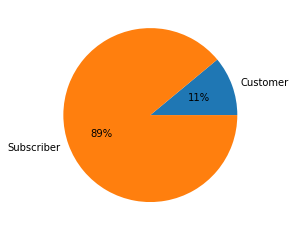

In [11]:
counts = data.groupby("usertype").size()
counts.plot.pie(autopct='%1.0f%%',ylabel="")

In [8]:
print(len(data))
n = len(data)
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
train_size = int(train_ratio*n)
val_size = int(val_ratio*n)
test_size = int(test_ratio*n)
print("Train: {0}, Val: {1}, Test: {2}".format(int(train_ratio*n), int(val_ratio*n), int(test_ratio*n)))

17548339
Train: 10529003, Val: 3509667, Test: 3509667


In [9]:
trainset,testset = train_test_split(data,test_size=test_size)
trainset,valset = train_test_split(trainset,test_size=val_size)
print(len(trainset),len(valset),len(testset))

10529005 3509667 3509667


In [10]:
with open("Data/Train.csv","w") as file:
    trainset.to_csv(file)

In [11]:
with open("Data/Validation.csv","w") as file:
    valset.to_csv(file)

In [12]:
with open("Data/Test.csv","w") as file:
    testset.to_csv(file)